<span style = "font-size: 24px;">Importing all the necessary libraries</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<span style = "font-size : 24px;">Loading train data.Preparation and analysis data</span>

In [4]:
data_train = pd.read_csv("C:\\Users\\Рома Кучерявий\\PycharmProjects\\pythonProject\\venv\\Titanik\\train.csv")
data = pd.DataFrame(data = data_train)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
data.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
data = data.drop(columns = "Name")
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


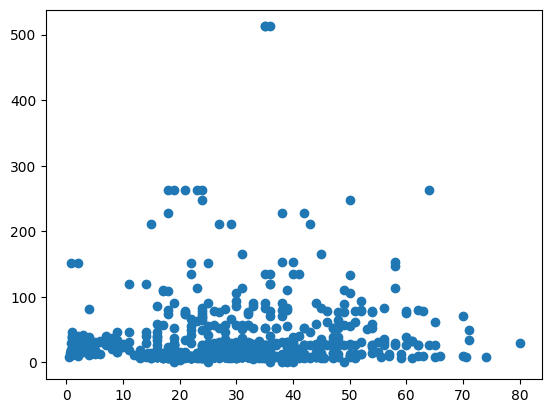

In [17]:
plt.scatter(data.Age , data.Fare)

In [18]:
data = data.replace({"Sex":{"male":0 , "female": 1}})

In [19]:
data.drop(columns = ["Cabin" , "Fare", "Ticket", "Embarked"])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,NaN,1,2
889,890,1,1,0,26.0,0,0


In [20]:
data = data.replace({"Embarked":{"S":0 , "C": 1 , "Q" : 2}})

In [21]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,0,26.0,0,0,111369,30.0000,C148,1.0


In [22]:
data = data.drop(columns = ["Cabin" ,  "Ticket"])

In [23]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0
888,889,0,3,1,NaN,1,2,23.4500,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [24]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


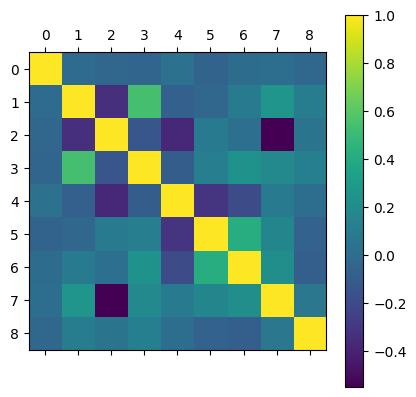

In [26]:
plt.matshow(data.corr())
cb = plt.colorbar()

<span style = "font-size :24px;">Loading test data</span>

In [27]:
data_t = pd.read_csv("C:\\Users\\Рома Кучерявий\\PycharmProjects\\pythonProject\\venv\\Titanik\\test.csv")

In [28]:
data_t = pd.DataFrame(data = data_t)

In [29]:
data = data.fillna(np.mean(data).round(0))

In [30]:
X_train , X_test , y_train , y_test = train_test_split(data.drop(columns = ["Survived" , "PassengerId"]) , data.Survived , random_state = 42 , test_size = 0.32)

In [32]:
model = LinearRegression().fit(X_train , y_train)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
pre = model.predict(X_test ).round()

In [35]:
accuracy_score(y_test , pre)

0.8076923076923077

In [36]:
data_t

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
data_t = data_t.drop(columns = ["Cabin" , "Ticket" ,"Name"])
data_t = data_t.replace({ "Embarked" :{"S":0 , "C": 1 , "Q" : 2} , "Sex":{"male":0 , "female": 1}}) 

In [38]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,0,58.0,1,1,15.2458,1.0
439,2,0,31.0,0,0,10.5000,0.0
840,3,0,20.0,0,0,7.9250,0.0
720,2,1,6.0,0,1,33.0000,0.0
39,3,1,14.0,1,0,11.2417,1.0
...,...,...,...,...,...,...,...
131,3,0,20.0,0,0,7.0500,0.0
334,1,1,58.0,1,0,133.6500,0.0
597,3,0,49.0,0,0,0.0000,0.0
135,2,0,23.0,0,0,15.0458,1.0


In [49]:
data_t


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.5,0,0,7.2500,0
416,1308,3,0,NaN,0,0,8.0500,0


In [39]:
data_t.Age = data_t.Age.fillna(np.mean(data_t.Age).round(0))

In [40]:
data_t.Fare = data_t.Fare.fillna(np.mean(data_t.Fare).round(0))

In [41]:
data_t.Age = data_t.Age.round()

In [42]:
data_t

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.0,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,62.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.0500,0
414,1306,1,1,39.0,0,0,108.9000,1
415,1307,3,0,38.0,0,0,7.2500,0
416,1308,3,0,30.0,0,0,8.0500,0


In [43]:
pre2 = model.predict(data_t.drop(columns = "PassengerId")).round(0)
pre2

array([ 0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0., -0.,  1.,  1.,  0.,  1.,  1.,  0

<span style = "font-size :24px;">Create a submission file</span>

In [ ]:
sub = pd.read_csv("C:\\Users\\Рома Кучерявий\\PycharmProjects\\pythonProject\\venv\\Titanik\\gender_submission.csv")

In [67]:
sub["Survived"] = pre2

In [66]:
sub["Survived"] = sub["Survived"].apply(int).apply(abs)

In [65]:
sub.to_csv("Titanik4.csv" , index = False)